In [76]:
#初始化包
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures

In [77]:
#在notebook中显示图片
%matplotlib inline

In [78]:
#导入文件数据的方法
def loaddata(file, dim):
    data = np.loadtxt(file, delimiter=dim)
    print data[:6,:]
    return data

In [79]:
#定义绘图的方法
def plotdata(data, l_x, l_y, l_pos, l_neg, axes=None):
    neg = data[:, 2] == 0
    pos = data[:, 2] == 1
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:, 0], data[pos][:, 1], marker = '+', c = 'k', s = 60, linewidth = 2, label = l_pos)
    axes.scatter(data[neg][:, 0], data[neg][:, 1], marker = 'o', c = 'y', s = 60, linewidth = 2, label = l_neg)
    axes.set_xlabel(l_x)   
    axes.set_ylabel(l_y)
    axes.legend(frameon=True, fancybox=True)

In [80]:
#定义sigmoid函数
def sigmoid(z):
    r = 1.0 / (1 + np.exp( -z ))
    return r

In [81]:
#定义损失函数
def costF(theta, X, y):
     m = y.size
     #y必须为列向量
     y = y.reshape(-1, 1)
     theta = theta.reshape(-1, 1) 
     h = sigmoid(X.dot(theta))         
     J = (-1.0 / m) * (np.log(h).T.dot(y) + np.log(1 - h).T.dot(1 - y))
     if np.isnan(J[0]):
        return np.inf
     else:
        return J[0]

In [82]:
#定义梯度下降函数
def gradient(theta, X, y):
    m = y.size
    theta = theta.reshape(-1, 1)
    y = y.reshape(-1, 1)
    h = sigmoid(X.dot(theta))
    grad = (1.0 / m) * X.T.dot(h - y)
    return grad.flatten()

In [83]:
#调用文本数据
data = loaddata("data1.txt", ",")

[[ 34.62365962  78.02469282   0.        ]
 [ 30.28671077  43.89499752   0.        ]
 [ 35.84740877  72.90219803   0.        ]
 [ 60.18259939  86.3085521    1.        ]
 [ 79.03273605  75.34437644   1.        ]
 [ 45.08327748  56.31637178   0.        ]]


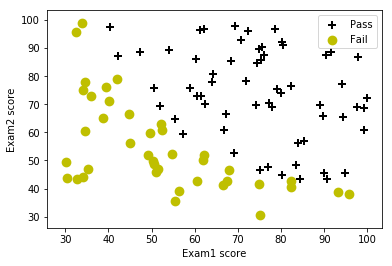

In [84]:
#绘制初始的样本集的散点图
plotdata(data, "Exam1 score", "Exam2 score", "Pass", "Fail")

In [85]:
#初始化样本集
y = np.c_[data[:,2]] #必须为列向量
X = np.c_[np.ones(y.shape[0]), data[:,:2]]
#初始化theta的值
theta = np.c_[np.zeros(X.shape[1])] #必须为列向量
#调用minimize进行损失函数的最小化
res = minimize(costF, theta, args=(X, y), method=None, jac=gradient, options={"maxiter":400})

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


In [86]:
#预测函数：
def predict(theta, X, threshold=0.5):
    theta = theta.reshape(-1, 1)
    p = sigmoid(X.dot(theta)) >= threshold 
    return p.astype("int")

In [87]:
#预测整个样本集的值
p = predict(res.x, X)
print sum( p == y)[0]
#计算准确率
accuracy = (100.0 *  sum( p == y)[0]) / y.size 
print "train_aacuracy {}%".format(accuracy)

89
train_aacuracy 89.0%


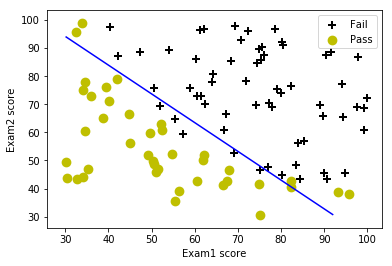

In [88]:
#绘制决策边界
#形成网格点样本集
x1_min, x1_max = X[:,1].min(), X[:,1].max()
x2_min, x2_max = X[:,2].min(), X[:,2].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
XX = np.c_[np.ones(xx1.size), xx1.ravel(), xx2.ravel()]
#计算网格点的sigmoid的值
h = sigmoid(XX.dot(res.x))
h = h.reshape(xx1.shape)
#绘制散点图
plotdata(data, "Exam1 score", "Exam2 score", "Fail", "Pass")
#绘制决策边界
plt.contour(xx1, xx2, h, [0.5], linewidth=1, colors='b')

In [92]:
#非线性边界LR回归
#定义带正则化项的损失函数
def costFR(theta, X, y, Reg):
    m = y.size
    theta = theta.reshape(-1, 1)
    y = y.reshape(-1, 1)
    h = sigmoid(X.dot(theta))
    J = (-1.0 / m) * (np.log(h).T.dot(y) + np.log(1 - h).T.dot(1 - y)) + ((1.0 * Reg)/ (2 * m)) * sum(np.square(theta))
    if np.isnan(J[0]):
        return np.inf
    else:
        return J[0]
    
#定义带正则化项的梯度函数
def gradientReg(theta, X, y, Reg):
    m = y.size
    theta = theta.reshape(-1, 1)
    y = y.reshape(-1, 1)
    h = sigmoid(X.dot(theta))
    grad = (1.0 / m) * X.T.dot(h - y) + ((1.0 * Reg) / m) * theta 
    return grad.ravel()


In [93]:
#读入数剧
data1 = loaddata("data2.txt", ",")

[[ 0.051267  0.69956   1.      ]
 [-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]
 [-0.52477   0.2098    1.      ]]


#
[ 0.69314718]
[  8.47457627e-03   1.87880932e-02   7.77711864e-05   5.03446395e-02
   1.15013308e-02   3.76648474e-02   1.83559872e-02   7.32393391e-03
   8.19244468e-03   2.34764889e-02   3.93486234e-02   2.23923907e-03
   1.28600503e-02   3.09593720e-03   3.93028171e-02   1.99707467e-02
   4.32983232e-03   3.38643902e-03   5.83822078e-03   4.47629067e-03
   3.10079849e-02   3.10312442e-02   1.09740238e-03   6.31570797e-03
   4.08503006e-04   7.26504316e-03   1.37646175e-03   3.87936363e-02]
[   35.10188941    44.11912847    69.27185439  -344.27886516  -198.23454101
  -184.22832495  -295.82023501  -621.73259173  -510.84925388  -328.31178249
  1094.69981802  1269.58561429  1757.74838729   900.93753051   436.5887353
   471.12011453  1236.23867855  1822.82035473  1929.66748644  1131.05303373
   463.79925361 -1142.11694456 -2020.9590703  -3463.3992842  -3484.51030339
 -3252.26685787 -1546.00895996  -510.41263637]
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


[ 81.3559322]
[ 0.00468519 -0.01727028  0.00641811 -0.05402535 -0.01327386 -0.03727034
 -0.01821338 -0.00760977 -0.00885247 -0.02224653 -0.04288317 -0.00238567
 -0.01393121 -0.00354775 -0.04072359 -0.02078684 -0.00467175 -0.00354971
 -0.00624859 -0.0050035  -0.03153264 -0.03381525 -0.00108325 -0.00694157
 -0.00039445 -0.00788561 -0.00157661 -0.04058927]
[0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  

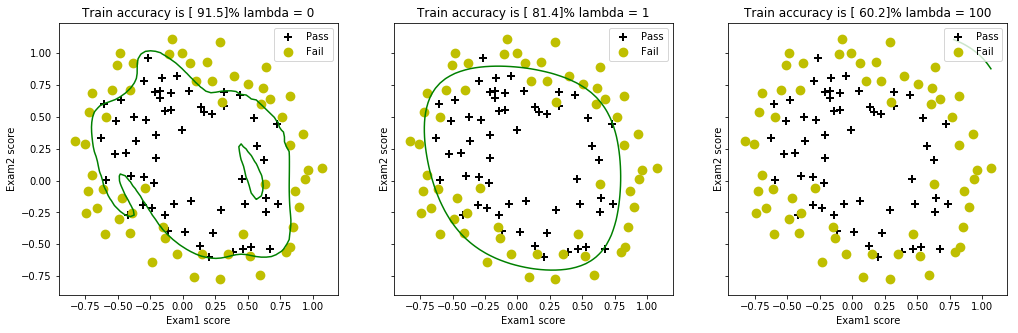

In [98]:
#形成样本集（非线性边界，因此要进行特征映射）
poly = PolynomialFeatures(6)
#形成多项式的特征集
XXX = poly.fit_transform(data1[:,:2])
#形成样本集的值
y = np.c_[data1[:,2]]
#形成theta的值
theta = np.c_[np.zeros(XXX.shape[1])]

#初始化图像的参数
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(17, 5))
#最小化损失函数
for i, reg in enumerate([0, 1, 100]):
    #最小化损失函数
    res = minimize(costFR, theta, args=(XXX, y, reg), method=None, jac=gradientReg, options={"maxiter":3000})
    #最小化损失函数
    res = minimize(costFR, theta, args=(XXX, y, reg), method=None, jac=gradientReg, options={"maxiter":3000})
    print res.x
    #形成网格点
    x1_min, x1_max = data1[:, 0].min(), data1[:, 0].max()
    x2_min, x2_max = data1[:, 1].min(), data1[:, 1].max()
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    XXXX = poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()])
    h = sigmoid(XXXX.dot(res.x.reshape(-1, 1)))
    h = h.reshape(xx1.shape)
    #绘制边界
    axes.flatten()[i].contour(xx1, xx2, h, [0.4], linwidth=1, colors='g')
    #绘制散点图
    plotdata(data1, "Exam1 score", "Exam2 score", "Pass", "Fail", axes.flatten()[i])
    #显示预测的准确率
    accuracy = 100.0 * sum(predict(res.x, XXX) == y) / y.size
    axes.flatten()[i].set_title("Train accuracy is {}% lambda = {}".format(np.round(accuracy, decimals=1), reg))